In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import numpy to generate some dummy data
%matplotlib inline

In [281]:
df1=pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [282]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [283]:
df1['studio'].value_counts()

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
        ... 
CAVU       1
JS         1
CP         1
SEG        1
BGP        1
Name: studio, Length: 257, dtype: int64

In [284]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [285]:
df2=pd.read_csv('zippedData/imdb.name.basics.csv.gz')

In [286]:
df3=pd.read_csv('zippedData/imdb.title.akas.csv.gz')

In [322]:
#df4=pd.read_csv('zippedData/imdb.title.basics.csv.gz', dtype=str)
df4=pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [288]:
df4.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [328]:
df4=pd.read_csv('zippedData/imdb.title.basics.csv.gz')

# Split the 'genres' column by comma into separate genre columns
df4['genres'] = df4['genres'].str.split(',')

# Explode the 'genres' column to create multiple rows for each genre
new_df = df4.explode('genres')

# Reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)

# Remove rows with NaN values from the DataFrame
new_df = new_df.dropna()

# Reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)


# Display the new DataFrame
print(new_df)
new_df.head()

           tconst                                      primary_title  \
0       tt0063540                                          Sunghursh   
1       tt0063540                                          Sunghursh   
2       tt0063540                                          Sunghursh   
3       tt0066787                    One Day Before the Rainy Season   
4       tt0066787                    One Day Before the Rainy Season   
...           ...                                                ...   
193726  tt9916170                                      The Rehearsal   
193727  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...   
193728  tt9916190                                          Safeguard   
193729  tt9916190                                          Safeguard   
193730  tt9916538                                Kuambil Lagi Hatiku   

                                           original_title  start_year  \
0                                               Sunghursh     

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175.00,Crime
2,tt0063540,Sunghursh,Sunghursh,2013,175.00,Drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,Biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,Drama


In [329]:
df4.isnull().values.any()

True

In [330]:
df4.isnull()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
146139,False,False,False,False,False,False
146140,False,False,False,False,True,False
146141,False,False,False,False,True,False
146142,False,False,False,False,False,True


In [331]:
per_missing=df4.isnull().sum()*100/len(df4)
per_missing

tconst             0.00
primary_title      0.00
original_title     0.01
start_year         0.00
runtime_minutes   21.72
genres             3.70
dtype: float64

In [332]:
df4.dropna(axis=0)
df4.isnull()
df4.dropna()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,[Drama]
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"[Comedy, Drama, Fantasy]"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,[Comedy]
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.00,[Documentary]
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.00,[Drama]
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.00,[Documentary]
146137,tt9916190,Safeguard,Safeguard,2019,90.00,"[Drama, Thriller]"


In [333]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [334]:
df5=pd.read_csv('zippedData/imdb.title.crew.csv.gz')

In [335]:
title = "Marvel's The Avengers"

# Filter rows based on the movie title
movie_row = df4[df4['original_title'] == title]

# Extract the genres for the specific movie
genres_for_movie = movie_row['genres']

# Display the genres
print(genres_for_movie)

Series([], Name: genres, dtype: object)


In [336]:
df6=pd.read_csv('zippedData/imdb.title.principals.csv.gz')

In [337]:
#df7=pd.read_csv('zippedData/imdb.title.ratings.csv.gz',dtype=str)
df7=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [338]:
df7.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [339]:
df8=pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [340]:
df9=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [341]:
df7['averagerating'].value_counts()

7.00     2262
6.60     2251
7.20     2249
6.80     2239
6.50     2221
         ... 
9.60       18
10.00      16
9.80       15
9.70       12
9.90        5
Name: averagerating, Length: 91, dtype: int64

In [342]:
#merge 2 dataset new df4(imdb.title.basics with splited genres) and df7(imdb.title.ratings)
inner_merge=pd.merge(new_df,df7,on='tconst')

In [343]:
inner_merge.isnull().sum()
inner_merge.dropna()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,Action,7.00,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.00,Crime,7.00,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.00,Drama,7.00,77
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,Biography,7.20,43
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,Drama,7.20,43
...,...,...,...,...,...,...,...,...
118432,tt9913056,Swarm Season,Swarm Season,2019,86.00,Documentary,6.20,5
118433,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00,Documentary,6.20,6
118434,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00,Drama,8.70,136
118435,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00,Family,8.70,136


In [344]:
inner_merge.isnull().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [345]:
inner_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118437 entries, 0 to 118436
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           118437 non-null  object 
 1   primary_title    118437 non-null  object 
 2   original_title   118437 non-null  object 
 3   start_year       118437 non-null  int64  
 4   runtime_minutes  118437 non-null  float64
 5   genres           118437 non-null  object 
 6   averagerating    118437 non-null  float64
 7   numvotes         118437 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 8.1+ MB


Text(0, 0.5, 'Average Rating')

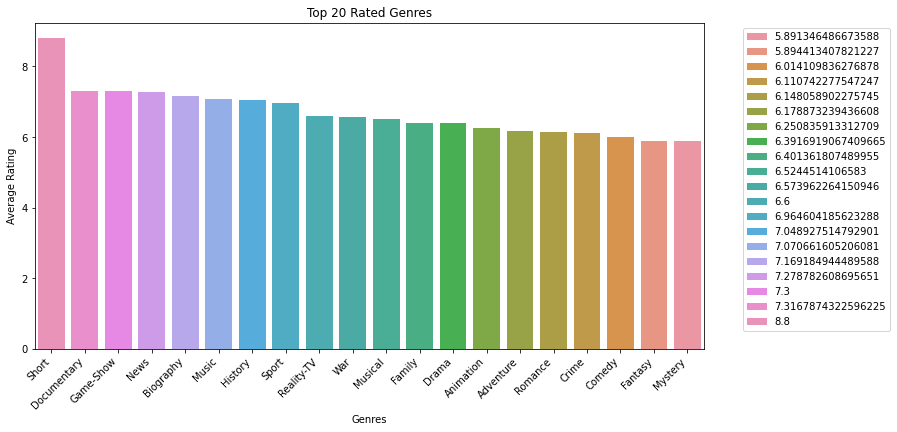

In [346]:
inner_merge['averagerating'] = pd.to_numeric(inner_merge['averagerating'], errors='coerce')
mean_df = inner_merge.groupby('genres')['averagerating'].mean().reset_index().sort_values(by='averagerating', ascending=False)
top10_rating = mean_df.nlargest(20, 'averagerating')
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='averagerating', data=top10_rating,hue='averagerating',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Top 20 Rated Genres')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Average Rating')

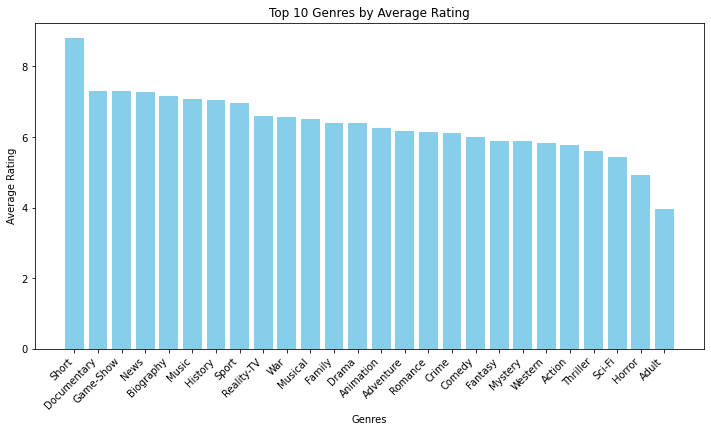

In [347]:
#inner_merge['averagerating'] = pd.to_numeric(inner_merge['averagerating'], errors='coerce')

# Set up the plot
plt.figure(figsize=(12, 6))
plt.bar(mean_df['genres'][:30],mean_df['averagerating'][:30], color='skyblue')
#plt.bar(inner_merge['average_rating'][:100], inner_merge['count'][:100], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres by Average Rating')
plt.xticks(rotation=45, ha="right")

plt.show()

In [348]:
df1.head()
df1['foreign_gross'] = df1['foreign_gross'].astype(str)
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '').astype(float)

In [349]:
bv_movies=df1[df1['studio']=='BV']
bv_movie_titles = bv_movies['title']
bv_movie_titles

727        Marvel's The Avengers
1875     Avengers: Age of Ultron
3080               Black Panther
2758    Star Wars: The Last Jedi
1127                      Frozen
                  ...           
2499              Queen of Katwe
1297            The Fifth Estate
304       Waking Sleeping Beauty
512                         Prom
889               People Like Us
Name: title, Length: 106, dtype: object

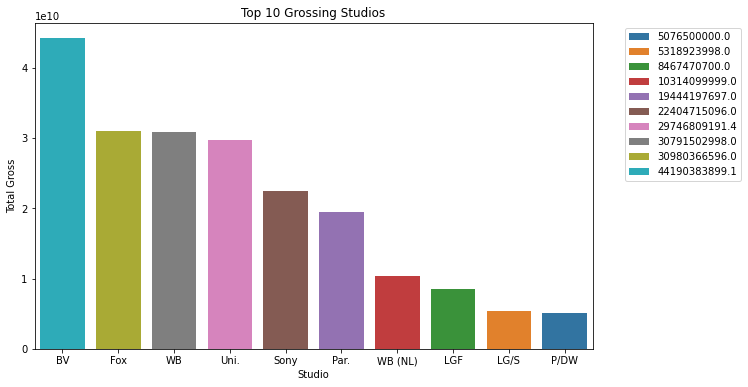

In [350]:
df1['total_gross'] = df1['domestic_gross'] + df1['foreign_gross']
cleaned_df1 = df1.dropna()
grouped_df1=cleaned_df1.groupby('studio')['total_gross'].sum().reset_index().sort_values(by='total_gross', ascending=False)
top10_std = grouped_df1.nlargest(10, 'total_gross')
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(10, 6))
sns.barplot(x='studio', y='total_gross', data=top10_std,hue='total_gross',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Top 10 Grossing Studios')
plt.xlabel('Studio')
plt.ylabel('Total Gross')
#plt.yticks(top10_std['total_gross'], ['${:,.0f}'.format(label) for label in top10_std['total_gross']])

plt.show()


In [351]:
top10_std.sort_values(by='total_gross')

,studio,total_gross
116,P/DW,5076500000.00
88,LG/S,5318923998.00
89,LGF,8467470700.00
164,WB (NL),10314099999.00
126,Par.,19444197697.00
142,Sony,22404715096.00
155,Uni.,29746809191.40
163,WB,30791502998.00
57,Fox,30980366596.00
22,BV,44190383899.10


In [352]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.00,895500000.00,2012,1518900000.00
1875,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00
3080,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.00,960500000.00,2011,1341500000.00
2758,Star Wars: The Last Jedi,BV,620200000.00,712400000.00,2017,1332600000.00


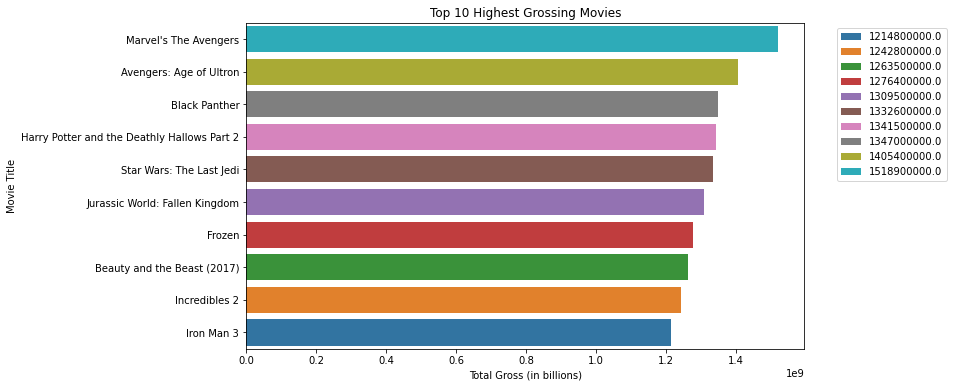

In [353]:
df1.sort_values(by='total_gross', ascending=False, inplace=True)
top_10_grossed_movies = df1.head(10)
top_10_grossed_movies
#plt.gca().invert_yaxis()  # Invert y-axis to show the highest-grossing movie at the top
plt.figure(figsize=(10, 6))
sns.barplot(x='total_gross', y='title', data=top_10_grossed_movies,hue='total_gross',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Top 10 Highest Grossing Movies')
plt.xlabel('Total Gross (in billions)')
plt.ylabel('Movie Title')
#plt.yticks(top10_std['total_gross'], ['${:,.0f}'.format(label) for label in top10_std['total_gross']])

plt.show()


In [354]:
top_10_grossed_movies.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.00,895500000.00,2012,1518900000.00
1875,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00
3080,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.00,960500000.00,2011,1341500000.00
2758,Star Wars: The Last Jedi,BV,620200000.00,712400000.00,2017,1332600000.00


In [355]:
df4.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"[Comedy, Drama, Fantasy]"


In [356]:
bv_movie_titles.head()

727        Marvel's The Avengers
1875     Avengers: Age of Ultron
3080               Black Panther
2758    Star Wars: The Last Jedi
1127                      Frozen
Name: title, dtype: object

In [361]:
#df4.rename(columns={'primary_title': 'title'}, inplace=True)
new_df.rename(columns={'primary_title': 'title'}, inplace=True)
bv_movie_titles_df = pd.DataFrame({'title': bv_movie_titles})
required_merge = bv_movie_titles_df.merge(new_df, on='title', how='left')
bv_movie_genres = required_merge[['title', 'genres']]
print(bv_movie_genres)


                       title     genres
0      Marvel's The Avengers        NaN
1    Avengers: Age of Ultron     Action
2    Avengers: Age of Ultron  Adventure
3    Avengers: Age of Ultron     Sci-Fi
4              Black Panther     Action
..                       ...        ...
274                     Prom      Drama
275                     Prom     Family
276           People Like Us     Comedy
277           People Like Us      Drama
278           People Like Us      Drama

[279 rows x 2 columns]


In [362]:
top_10_grossed_movies_title=top_10_grossed_movies['title']
top_10_grossed_movies_df = pd.DataFrame({'title': top_10_grossed_movies_title})
required_grossmerge = top_10_grossed_movies_df.merge(new_df, on='title', how='left')
top_10_grossed_movies_genres = required_grossmerge[['title', 'genres']]
print(top_10_grossed_movies_genres)



                                          title     genres
0                         Marvel's The Avengers        NaN
1                       Avengers: Age of Ultron     Action
2                       Avengers: Age of Ultron  Adventure
3                       Avengers: Age of Ultron     Sci-Fi
4                                 Black Panther     Action
5                                 Black Panther  Adventure
6                                 Black Panther     Sci-Fi
7   Harry Potter and the Deathly Hallows Part 2        NaN
8                      Star Wars: The Last Jedi     Action
9                      Star Wars: The Last Jedi  Adventure
10                     Star Wars: The Last Jedi    Fantasy
11               Jurassic World: Fallen Kingdom     Action
12               Jurassic World: Fallen Kingdom  Adventure
13               Jurassic World: Fallen Kingdom     Sci-Fi
14                                       Frozen  Adventure
15                                       Frozen      Dra

In [363]:
bv_movie_genres_df=pd.DataFrame(bv_movie_genres)
bv_movie_genres_df.isnull().sum()
bv_movie_genres_df.dropna()
top_15_genres=bv_movie_genres_df['genres'].value_counts()
top_15_genres.head(15)

Adventure      57
Comedy         38
Action         30
Animation      25
Drama          24
Family         19
Fantasy        13
Biography      10
Documentary     9
Sci-Fi          9
History         6
Romance         5
Sport           4
Crime           3
Thriller        3
Name: genres, dtype: int64

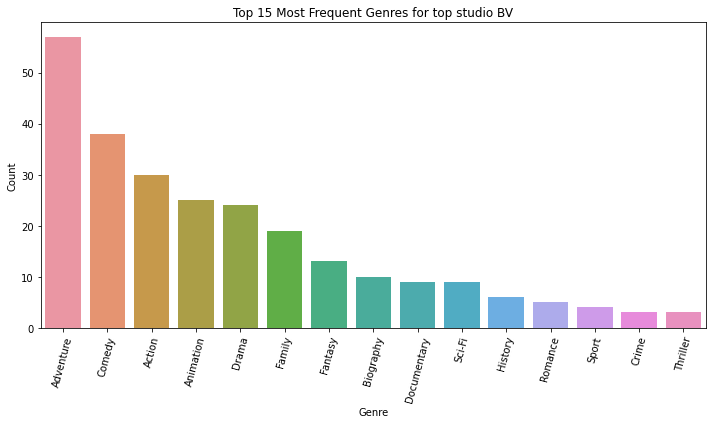

In [364]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_genres.head(15).index, y=top_15_genres.head(15).values)
plt.title('Top 15 Most Frequent Genres for top studio BV')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [365]:
genre_counts = bv_movie_genres['genres'].value_counts()
most_frequent_genre = genre_counts.idxmax()
frequency_of_most_frequent_genre = genre_counts.max()
print(f"The most frequent genre is '{most_frequent_genre}' with {frequency_of_most_frequent_genre} occurrences.")

The most frequent genre is 'Adventure' with 57 occurrences.


In [366]:
new_df.rename(columns={'primary_title': 'title'}, inplace=True)
df14 = df1.merge(new_df, left_on='title', right_on='title', how='inner')

# Select the desired columns: 'title', 'total_gross', and 'genres'
result_df14 = df14[['title', 'total_gross', 'genres']]

# Display the resulting DataFrame
print(result_df14)


                        title   total_gross     genres
0     Avengers: Age of Ultron 1405400000.00     Action
1     Avengers: Age of Ultron 1405400000.00  Adventure
2     Avengers: Age of Ultron 1405400000.00     Sci-Fi
3               Black Panther 1347000000.00     Action
4               Black Panther 1347000000.00  Adventure
...                       ...           ...        ...
7244      Beauty and the Dogs           nan   Thriller
7245                The Quake           nan     Action
7246                The Quake           nan      Drama
7247                The Quake           nan   Thriller
7248        An Actor Prepares           nan     Comedy

[7249 rows x 3 columns]


In [367]:
result_df14.isnull()
result_df14.dropna()

,title,total_gross,genres
0,Avengers: Age of Ultron,1405400000.00,Action
1,Avengers: Age of Ultron,1405400000.00,Adventure
2,Avengers: Age of Ultron,1405400000.00,Sci-Fi
3,Black Panther,1347000000.00,Action
4,Black Panther,1347000000.00,Adventure
...,...,...,...
4520,Aurora,10800.00,Comedy
4521,Aurora,10800.00,Drama
4522,Aurora,10800.00,Romance
4523,Aurora,10800.00,Horror


In [368]:
grouped_genres=result_df14.groupby('genres')['total_gross'].sum()
grouped_genres = grouped_genres.sort_values(ascending=False)
top10_grouped_genres=grouped_genres.head(10)
top10_grouped_genres

genres
Adventure   119793348881.90
Action      106058673054.90
Comedy       77395416492.00
Drama        68195958289.00
Animation    38923828497.00
Sci-Fi       38628524687.90
Thriller     34573501869.00
Fantasy      27574309599.00
Crime        18881017972.00
Romance      16004232394.00
Name: total_gross, dtype: float64

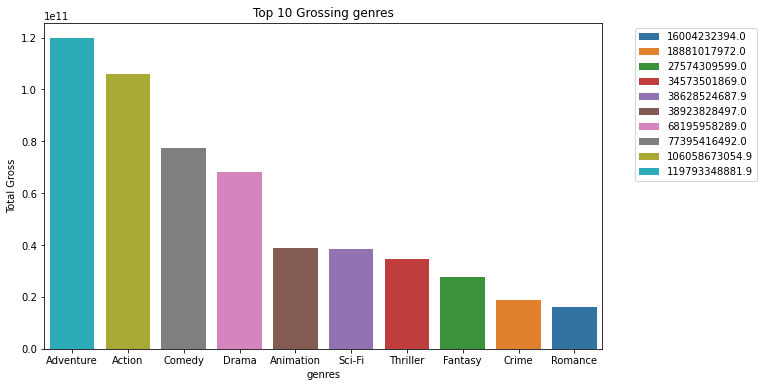

In [369]:
top10_grouped_genres = top10_grouped_genres.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='genres', y='total_gross', data=top10_grouped_genres,hue='total_gross',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Top 10 Grossing genres')
plt.xlabel('genres')
plt.ylabel('Total Gross')
#plt.yticks(top10_std['total_gross'], ['${:,.0f}'.format(label) for label in top10_std['total_gross']])

plt.show()


In [370]:
new_df.head(2)

,tconst,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175.00,Crime


In [371]:
df9.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [372]:
df49 = new_df.merge(df9, left_on='title', right_on='movie', how='inner')

# Extract year from release_date column and convert it to integer
df49['release_year'] = pd.to_datetime(df49['release_date']).dt.year.astype(int)


In [373]:
result_df49=df49[['genres','worldwide_gross','release_year']]

In [374]:
result_df49.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7204 entries, 0 to 7203
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   genres           7204 non-null   object
 1   worldwide_gross  7204 non-null   object
 2   release_year     7204 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 197.0+ KB


<ipython-input-375-b778d8ae8504>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df49['worldwide_gross'] = result_df49['worldwide_gross'].astype(str)
<ipython-input-375-b778d8ae8504>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df49['worldwide_gross'] = result_df49['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


<Figure size 1152x432 with 0 Axes>

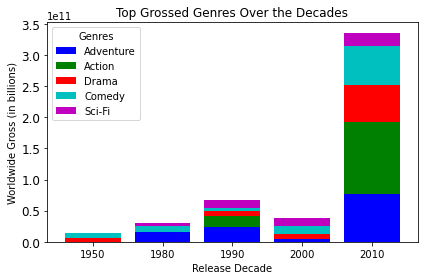

In [375]:
result_df49['worldwide_gross'] = result_df49['worldwide_gross'].astype(str)
result_df49['worldwide_gross'] = result_df49['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
# Round the release_year to the nearest decade
grouped_df['release_decade'] = (result_df49['release_year'] // 10) * 10

# Choose the top N genres based on total gross
top_n = 5
top_genres = grouped_df.groupby('genres')['worldwide_gross'].sum().nlargest(top_n).index

# Filter the DataFrame to include only the top genres
filtered_df = grouped_df[grouped_df['genres'].isin(top_genres)]

# Create a pivot table for plotting
pivot_table = filtered_df.pivot_table(index='release_decade', columns='genres', values='worldwide_gross', aggfunc='sum', fill_value=0)

# Set the figure size to span the entire width
plt.figure(figsize=(16, 6))

# Plot the data with thicker bars and readable years on the y-axis
colors = ['b', 'g', 'r', 'c', 'm']  # Define colors for the genres
ax = pivot_table.plot(kind='bar', stacked=True, color=colors, width=0.8)
plt.title('Top Grossed Genres Over the Decades')
plt.ylabel('Worldwide Gross (in billions)')
plt.xlabel('Release Decade')
plt.xticks(rotation=0)  # Remove rotation on x-axis labels
plt.yticks(fontsize=12)  # Increase font size for y-axis labels
plt.legend(title='Genres', loc='upper left', labels=top_genres)
plt.tight_layout()  # Ensure all labels are visible

plt.show()

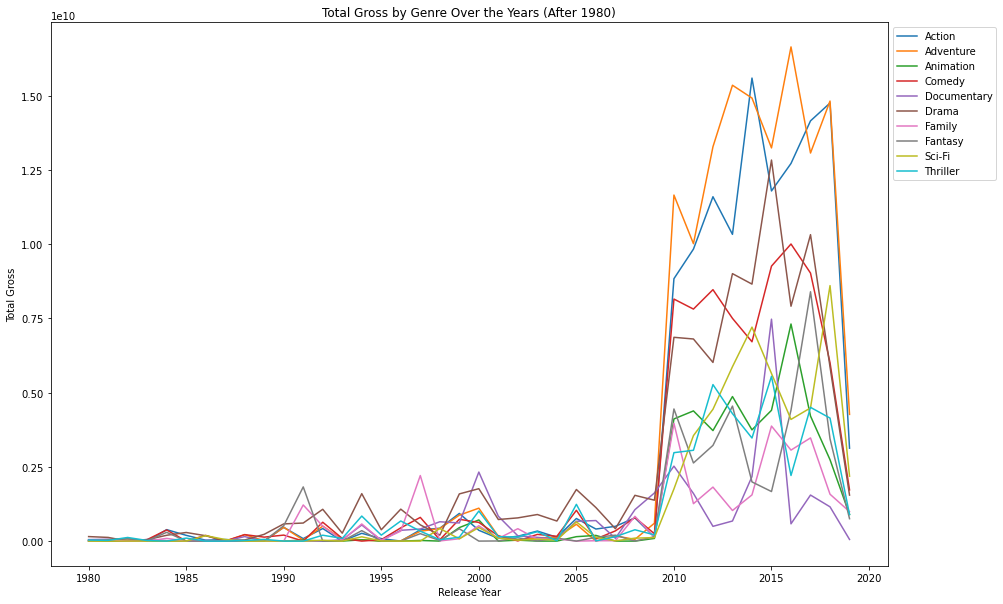

In [376]:
# Assuming your DataFrame is named df
# Filter data for years after 1980
df_filtered = result_df49[result_df49['release_year'] >= 1980]

# Group by genre and calculate total gross
genre_total_gross = df_filtered.groupby('genres')['worldwide_gross'].sum()

# Select the top 10 genres by total gross
top_10_genres = genre_total_gross.nlargest(10)

# Filter the original DataFrame to include only the top 10 genres
df_filtered = df_filtered[df_filtered['genres'].isin(top_10_genres.index)]

# Pivot the DataFrame for plotting
genre_yearly_gross = df_filtered.groupby(['genres', 'release_year'])['worldwide_gross'].sum().unstack().fillna(0)

# Transpose the DataFrame so that years are on the y-axis
genre_yearly_gross = genre_yearly_gross.T

# Set a larger figure size (adjust the numbers as needed)
plt.figure(figsize=(15, 10))

# Create a line chart for each genre
for genre in genre_yearly_gross.columns:
    plt.plot(genre_yearly_gross.index, genre_yearly_gross[genre], label=genre)

# Set labels and title
plt.xlabel('Release Year')
plt.ylabel('Total Gross')
plt.title('Total Gross by Genre Over the Years (After 1980)')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

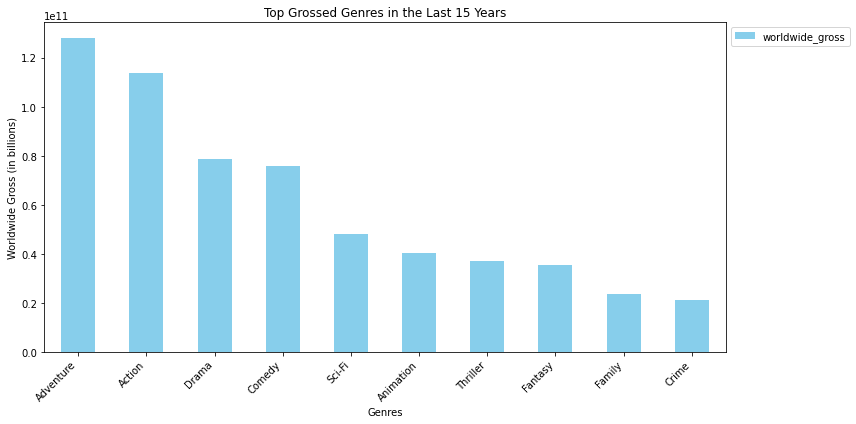

In [377]:
current_year = 2023
last_15_years_df = result_df49[result_df49['release_year'] >= (current_year - 15)]

# Group by genres and sum the worldwide gross
genre_gross = last_15_years_df.groupby('genres')['worldwide_gross'].sum()

# Sort genres by total gross in descending order
top_grossed_genres = genre_gross.sort_values(ascending=False).head(10)  # Change the number if you want more or fewer genres

# Create a bar plot
plt.figure(figsize=(12, 6))
top_grossed_genres.plot(kind='bar', color='skyblue')
plt.title('Top Grossed Genres in the Last 15 Years')
plt.xlabel('Genres')
plt.ylabel('Worldwide Gross (in billions)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()